In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [243]:
df = pd.read_excel("online_retail_II-230817-120704.xlsx")

In [244]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [245]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print('##################### Describe ###############')
    print(df.describe())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [246]:
check_df(df)

##################### Shape #####################
(525461, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
##################### Tail #####################
       Invoice 

C:\Users\s7522\AppData\Local\Temp\ipykernel_2292\285028053.py:15: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [247]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O'
                        and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and
                        dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [248]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 525461
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


In [249]:
def outliers(dataframe, col_name, q1=0.05, q3=0.95):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interq = quantile3 - quantile1
    
    down = quantile1 - 1.5 * interq
    up = quantile3 + 1.5 * interq
    
    return down, up

In [252]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [253]:
num_cols = [col for col in num_cols if col not in ['Customer ID', 'InvoiceDate']]

In [254]:
for col in num_cols:
    print(outliers(df, col))

(-42.5, 73.5)
(-14.205, 24.795)


In [255]:
def check_outliers(dataframe, col_name):
    down, up = outliers(dataframe, col_name)
    if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
        return True
    else:
        return False

In [256]:
for col in num_cols:
    print(col, check_outliers(df, col))

Quantity True
Price True


C:\Users\s7522\AppData\Local\Temp\ipykernel_2292\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_2292\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):


In [257]:
def replace_outliers(dataframe,col_name):
    down, up = outliers(dataframe,col_name)
    if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
        dataframe.loc[(dataframe[col_name] < down) , col_name] = down
        dataframe.loc[(dataframe[col_name] > up) , col_name] = up
        return dataframe


In [258]:
for col in num_cols:
    replace_outliers(df, col)

C:\Users\s7522\AppData\Local\Temp\ipykernel_2292\303119449.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_2292\303119449.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):


In [259]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    525461.000000
mean          8.000197
std          13.476100
min         -42.500000
5%            1.000000
10%           1.000000
20%           1.000000
30%           1.000000
40%           2.000000
50%           3.000000
60%           5.000000
70%           8.000000
80%          12.000000
90%          24.000000
95%          30.000000
99%          73.500000
max          73.500000
Name: Quantity, dtype: float64


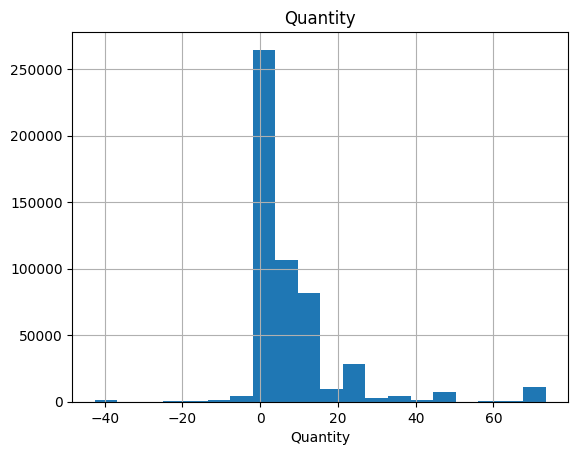

count    525461.000000
mean          3.429349
std           3.677612
min         -14.205000
5%            0.420000
10%           0.650000
20%           1.250000
30%           1.280000
40%           1.660000
50%           2.100000
60%           2.950000
70%           3.750000
80%           4.950000
90%           7.950000
95%          10.170000
99%          19.950000
max          24.795000
Name: Price, dtype: float64


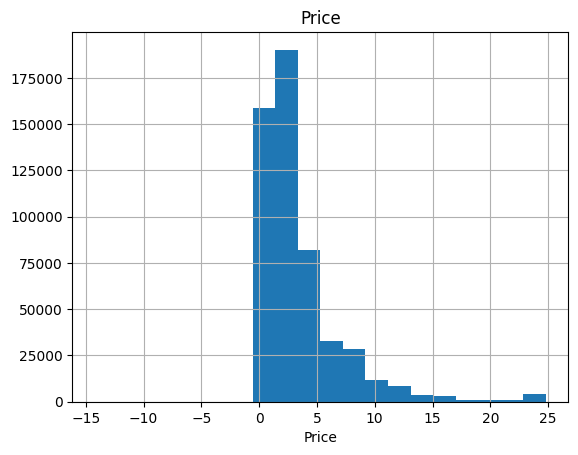

In [260]:
for col in num_cols:
    num_summary(df, col, plot = True)

In [262]:
df = df.drop(columns = ['Customer ID', 'InvoiceDate'],axis=1)

In [263]:
df.isna().sum()

Invoice           0
StockCode         0
Description    2928
Quantity          0
Price             0
Country           0
dtype: int64

In [264]:
df['Description'] = df['Description'].fillna(df['Description'].mode()[0])

In [265]:
df.isna().sum()


Invoice        0
StockCode      0
Description    0
Quantity       0
Price          0
Country        0
dtype: int64

In [266]:
df

,Invoice,StockCode,Description,Quantity,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,1.25,United Kingdom
...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2.0,2.95,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.0,3.75,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,3.75,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,3.75,United Kingdom
